In [21]:
# Importacion librerias necesarias
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

In [2]:
# Importacion documentos CSV a DataFrame
df_venta = pd.read_csv("../Data/locveevolucio.csv")
df_alquiler = pd.read_csv("../Data/loclloevolucio.csv")
df_actividades_pb = pd.read_csv('../Data/2019_censcomercialbcn_detall.csv')
df_densidadBarrio = pd.read_csv('../Data/2021_densitat.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_14212\1333934063.py:3: DtypeWarning: Columns (35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_actividades_pb = pd.read_csv('../Data/2019_censcomercialbcn_detall.csv')


In [3]:
df_capita = pd.read_csv('../Data/2019_renda_disponible_llars.csv')
df_capita
columnas_a_borrar = ['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri']
df_capita.drop(columnas_a_borrar, axis=1, inplace=True)
df_capita

,Nom_Barri,Euros_Any
0,el Raval,12142
1,el Barri Gòtic,16732
2,la Barceloneta,16322
3,"Sant Pere, Santa Caterina i la Ribera",18075
4,el Fort Pienc,23137
...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,25589
69,el Besòs i el Maresme,12787
70,Provençals del Poblenou,20080
71,Sant Martí de Provençals,18637


In [4]:
# PURGAR ARCHIVOS:Eliminacion data innecesaria para análisis
df_densidadBarrio.drop(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Superfície (ha)', 'Superfície Residencial (ha)', 'Densitat (hab/ha)'], axis=1, inplace=True)

In [5]:
df_densidadBarrio

,Nom_Barri,Població,Densitat neta (hab/ha)
0,el Raval,47228,952
1,el Barri Gòtic,21827,639
2,la Barceloneta,14643,1081
3,"Sant Pere, Santa Caterina i la Ribera",22131,683
4,el Fort Pienc,31262,930
...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,13323,556
69,el Besòs i el Maresme,25657,913
70,Provençals del Poblenou,20949,1368
71,Sant Martí de Provençals,26032,1111


In [ ]:
df_densidadBarrio.describe()

In [6]:
# Renombrar columnas a lenguaje entendible y acorde
df_venta = df_venta.rename(columns={'BARRIS':'BARRIS', 'DOSZEROONZE':'PRECIO_VENTA'})
# PURGAR ARCHIVOS: Eliminacion data en columnas innecesaria para análisis
df_venta.drop('DOSZERODEU', axis='columns', inplace=True) # Forma 2
df_venta.drop('DOSZEROZERONOU', axis='columns', inplace=True) # Forma 2
df_venta.drop('DOSZEROZEROVUIT', axis='columns', inplace=True) # Forma 2
df_venta.drop('DTE', axis='columns', inplace=True)
df_venta



,BARRIS,PRECIO_VENTA
0,1. el Raval,2.176
1,2. el Barri Gòtic,2.632
2,3. la Barceloneta,2.135
3,4. Sant Pere Santa Caterina i la Ribera,2.482
4,5. el Fort Pienc,2.224
...,...,...
68,69. Diagonal Mar i el Front Marítim del Poblenou,2.651
69,70. el Besòs i el Maresme,2.121
70,71. Provençals del Poblenou,2.255
71,72. Sant Martí de Provençals,1.812


In [ ]:
df_venta.describe()

In [7]:
# Renombrar columnas a lenguaje entendible y acorde
df_alquiler = df_alquiler.rename(columns={'BARRIS':'BARRIS', 'DOSZEROONZE':'PRECIO_ALQUILER'})
# PURGAR ARCHIVOS: Eliminacion data en columnas innecesaria para análisis
df_alquiler.drop('DOSZERODEU', axis='columns', inplace=True) 
df_alquiler.drop('DOSZEROZERONOU', axis='columns', inplace=True) 
df_alquiler.drop('DOSZEROZEROVUIT', axis='columns', inplace=True) 
df_alquiler.drop('DTE', axis='columns', inplace=True)
df_alquiler

,BARRIS,PRECIO_ALQUILER
0,1. el Raval,1189
1,2. el Barri Gòtic,1325
2,3. la Barceloneta,1648
3,4. Sant Pere Santa Caterina i la Ribera,1225
4,5. el Fort Pienc,921
...,...,...
68,69. Diagonal Mar i el Front Marítim del Poblenou,1126
69,70. el Besòs i el Maresme,--
70,71. Provençals del Poblenou,832
71,72. Sant Martí de Provençals,976


In [ ]:
df_alquiler.describe()

In [8]:
# Fusión de dfs solo en filas que coinciden en columna 'BARRIS' 
df_conjunto = pd.merge(df_alquiler,df_venta,how='inner',on='BARRIS')

In [9]:
# Eliminacion de carácteres en nombre 'BARRIS' en columnas que induzcan a error
df_conjunto['BARRIS'] = df_conjunto['BARRIS'].str.split('.').str[-1]
df_conjunto['BARRIS'] = df_conjunto['BARRIS'].str.strip()
df_conjunto


,BARRIS,PRECIO_ALQUILER,PRECIO_VENTA
0,el Raval,1189,2.176
1,el Barri Gòtic,1325,2.632
2,la Barceloneta,1648,2.135
3,Sant Pere Santa Caterina i la Ribera,1225,2.482
4,el Fort Pienc,921,2.224
...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1126,2.651
69,el Besòs i el Maresme,--,2.121
70,Provençals del Poblenou,832,2.255
71,Sant Martí de Provençals,976,1.812


In [10]:
# Renombrar columnas a lenguaje entendible y acorde
df_capita = df_capita.rename(columns={'Nom_Barri':'BARRIS'})
# Fusion del df_capita al df conjunto donde índice sea 'BARRIS'
df_conjunto = pd.merge(df_conjunto,df_capita,how='inner',on='BARRIS')
df_conjunto

,BARRIS,PRECIO_ALQUILER,PRECIO_VENTA,Euros_Any
0,el Raval,1189,2.176,12142
1,el Barri Gòtic,1325,2.632,16732
2,la Barceloneta,1648,2.135,16322
3,el Fort Pienc,921,2.224,23137
4,la Sagrada Família,1027,2.267,22753
...,...,...,...,...
64,Diagonal Mar i el Front Marítim del Poblenou,1126,2.651,25589
65,el Besòs i el Maresme,--,2.121,12787
66,Provençals del Poblenou,832,2.255,20080
67,Sant Martí de Provençals,976,1.812,18637


In [11]:
# Renombrar columnas a lenguaje entendible y acorde
df_densidadBarrio = df_densidadBarrio.rename(columns={'Nom_Barri':'BARRIS'})
# Fusion del df_densidadBarrio al df conjunto donde índice sea 'BARRIS'
df_conjunto = pd.merge(df_conjunto,df_densidadBarrio,how='inner',on="BARRIS")
df_conjunto


,BARRIS,PRECIO_ALQUILER,PRECIO_VENTA,Euros_Any,Població,Densitat neta (hab/ha)
0,el Raval,1189,2.176,12142,47228,952
1,el Barri Gòtic,1325,2.632,16732,21827,639
2,la Barceloneta,1648,2.135,16322,14643,1081
3,el Fort Pienc,921,2.224,23137,31262,930
4,la Sagrada Família,1027,2.267,22753,51319,1007
...,...,...,...,...,...,...
64,Diagonal Mar i el Front Marítim del Poblenou,1126,2.651,25589,13323,556
65,el Besòs i el Maresme,--,2.121,12787,25657,913
66,Provençals del Poblenou,832,2.255,20080,20949,1368
67,Sant Martí de Provençals,976,1.812,18637,26032,1111


In [12]:
# obtener el número de actividades por barrio y por nombre de actividad.
conteo_actividades = df_actividades_pb.groupby(['Nom_Barri', 'Nom_Activitat']).size().reset_index(name='Cantidad')
conteo_actividades

Nom_Activitat,Activitats de la construcció,Activitats de transport,Activitats de transport i emmagatzematge,Activitats emmagatzematge,Activitats immobiliàries,Activitats industrials,Administració,Agències de viatge,Altres,Altres ( per exemple VENDING),...,Vehicles,Vestir,Veterinaris / Mascotes,Xocolateries / Geladeries / Degustació,altres,serveis d'allotjament,serveis de menjar i begudes,Òptiques,Òptiques i fotografia,All
Nom_Barri,,,,,,,,,,,,,,,,,,,,,
Baró de Viver,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,77
Can Baró,9,2,0,7,0,4,0,1,0,0,...,0,2,2,0,0,0,0,1,0,309
Can Peguera,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,44
Canyelles,1,0,0,1,1,0,0,0,8,0,...,1,1,1,0,0,0,0,0,0,175
Ciutat Meridiana,1,1,0,0,1,0,3,0,9,0,...,0,3,0,0,0,0,0,1,0,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
la Vila de Gràcia,67,20,9,86,36,38,14,10,103,4,...,5,240,16,16,1,27,8,16,0,4457
les Corts,93,10,0,17,36,9,13,14,99,0,...,19,108,13,2,1,17,0,10,0,2428
les Roquetes,17,0,0,8,3,0,0,0,14,0,...,0,6,3,0,0,0,0,0,0,617


In [13]:

# Generar nueva  tabla de elementos cruzados Nom_Barri con Nom_Actividad
Seleccion_Actividades_por_Barrio= pd.crosstab(df_actividades_pb['Nom_Barri'], df_actividades_pb['Nom_Activitat'], margins=True)
# Reseteo del indice de Seleccion_Actividades_por_Barrio
Seleccion_Actividades_por_Barrio = Seleccion_Actividades_por_Barrio.reset_index()
# Renombrar columnas a lenguaje entendible y acorde
Seleccion_Actividades_por_Barrio = Seleccion_Actividades_por_Barrio.rename(columns={'Nom_Barri':'BARRIS'})
# Ordenar columnas en el df Seleccion_Actividades_por_Barrio
Seleccion_Actividades_por_Barrio = Seleccion_Actividades_por_Barrio[sorted(Seleccion_Actividades_por_Barrio.columns)]
Seleccion_Actividades_por_Barrio

Nom_Activitat,Activitats de la construcció,Activitats de transport,Activitats de transport i emmagatzematge,Activitats emmagatzematge,Activitats immobiliàries,Activitats industrials,Administració,Agències de viatge,All,Altres,...,Tintoreries,Vehicles,Vestir,Veterinaris / Mascotes,Xocolateries / Geladeries / Degustació,altres,serveis d'allotjament,serveis de menjar i begudes,Òptiques,Òptiques i fotografia
0,0,0,0,0,0,0,0,0,77,2,...,0,0,0,0,0,0,0,0,0,0
1,9,2,0,7,0,4,0,1,309,0,...,1,0,2,2,0,0,0,0,1,0
2,0,0,0,0,0,0,2,0,44,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,175,8,...,1,1,1,1,0,0,0,0,0,0
4,1,1,0,0,1,0,3,0,203,9,...,0,0,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,67,20,9,86,36,38,14,10,4457,103,...,23,5,240,16,16,1,27,8,16,0
70,93,10,0,17,36,9,13,14,2428,99,...,16,19,108,13,2,1,17,0,10,0
71,17,0,0,8,3,0,0,0,617,14,...,2,0,6,3,0,0,0,0,0,0
72,9,1,0,2,16,0,5,3,540,8,...,4,3,3,3,0,0,4,0,2,0


In [ ]:
Seleccion_Actividades_por_Barrio.describe()

In [14]:
# Fusion  de dfs por indice 'BARRIS'
df_conjunto = pd.merge(df_conjunto,Seleccion_Actividades_por_Barrio,how='inner',on="BARRIS")

In [15]:
# Conversion de tipos de datos para análisis correctos
df_conjunto.PRECIO_ALQUILER = pd.to_numeric(df_conjunto.PRECIO_ALQUILER,errors="coerce")
df_conjunto.PRECIO_VENTA = pd.to_numeric(df_conjunto.PRECIO_VENTA,errors="coerce")

In [16]:
df_conjunto.head(20)

,BARRIS,PRECIO_ALQUILER,PRECIO_VENTA,Euros_Any,Població,Densitat neta (hab/ha),Activitats de la construcció,Activitats de transport,Activitats de transport i emmagatzematge,Activitats emmagatzematge,...,Tintoreries,Vehicles,Vestir,Veterinaris / Mascotes,Xocolateries / Geladeries / Degustació,altres,serveis d'allotjament,serveis de menjar i begudes,Òptiques,Òptiques i fotografia
0,el Raval,1189.0,2.176,12142,47228,952,27,23,0,55,...,20,1,118,4,9,0,80,0,8,0
1,el Barri Gòtic,1325.0,2.632,16732,21827,639,5,27,0,30,...,5,1,258,3,28,0,75,0,27,0
2,la Barceloneta,1648.0,2.135,16322,14643,1081,9,10,0,17,...,5,0,20,5,0,0,5,0,4,0
3,el Fort Pienc,921.0,2.224,23137,31262,930,29,14,0,84,...,8,18,39,6,1,0,14,0,4,0
4,la Sagrada Família,1027.0,2.267,22753,51319,1007,73,24,6,69,...,19,20,81,8,10,0,20,5,16,0
5,la Dreta de l'Eixample,1073.0,2.302,30341,44675,392,39,4,104,14,...,16,18,379,15,11,0,138,55,8,24
6,l'Antiga Esquerra de l'Eixample,1209.0,2.471,27634,41990,627,39,9,11,63,...,16,14,146,14,8,2,41,17,13,1
7,la Nova Esquerra de l'Eixample,958.0,2.314,25378,57054,876,46,12,0,36,...,16,32,69,19,2,1,25,0,10,0
8,Sant Antoni,894.0,2.051,22851,38053,921,27,13,2,34,...,12,6,144,17,5,3,23,0,9,0
9,la Marina de Port,784.0,1.968,16999,30741,789,12,7,1,4,...,5,4,11,3,0,1,1,0,3,0


In [18]:
# ELiminación de columna no importante para análisis
df_conjunto.drop('All', axis='columns', inplace=True)
df_conjunto

,BARRIS,PRECIO_ALQUILER,PRECIO_VENTA,Euros_Any,Població,Densitat neta (hab/ha),Activitats de la construcció,Activitats de transport,Activitats de transport i emmagatzematge,Activitats emmagatzematge,...,Tintoreries,Vehicles,Vestir,Veterinaris / Mascotes,Xocolateries / Geladeries / Degustació,altres,serveis d'allotjament,serveis de menjar i begudes,Òptiques,Òptiques i fotografia
0,el Raval,1189.0,2.176,12142,47228,952,27,23,0,55,...,20,1,118,4,9,0,80,0,8,0
1,el Barri Gòtic,1325.0,2.632,16732,21827,639,5,27,0,30,...,5,1,258,3,28,0,75,0,27,0
2,la Barceloneta,1648.0,2.135,16322,14643,1081,9,10,0,17,...,5,0,20,5,0,0,5,0,4,0
3,el Fort Pienc,921.0,2.224,23137,31262,930,29,14,0,84,...,8,18,39,6,1,0,14,0,4,0
4,la Sagrada Família,1027.0,2.267,22753,51319,1007,73,24,6,69,...,19,20,81,8,10,0,20,5,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Diagonal Mar i el Front Marítim del Poblenou,1126.0,2.651,25589,13323,556,13,0,0,1,...,3,0,46,2,1,0,12,0,7,0
65,el Besòs i el Maresme,NaN,2.121,12787,25657,913,9,2,0,31,...,7,1,7,1,0,0,1,0,3,0
66,Provençals del Poblenou,832.0,2.255,20080,20949,1368,20,5,0,29,...,1,5,7,1,0,2,1,0,1,0
67,Sant Martí de Provençals,976.0,1.812,18637,26032,1111,28,0,0,12,...,4,3,18,7,2,1,0,0,4,0


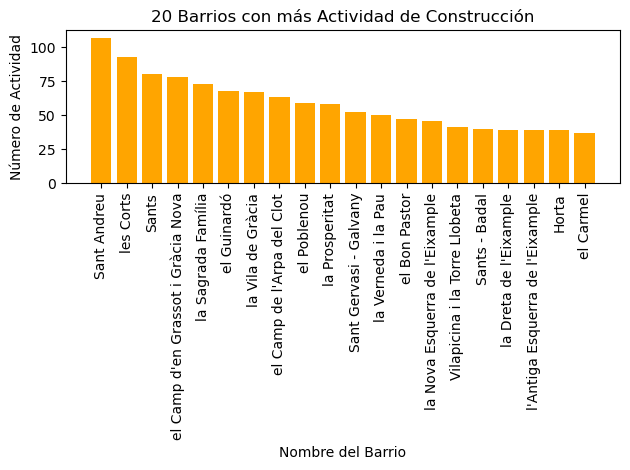

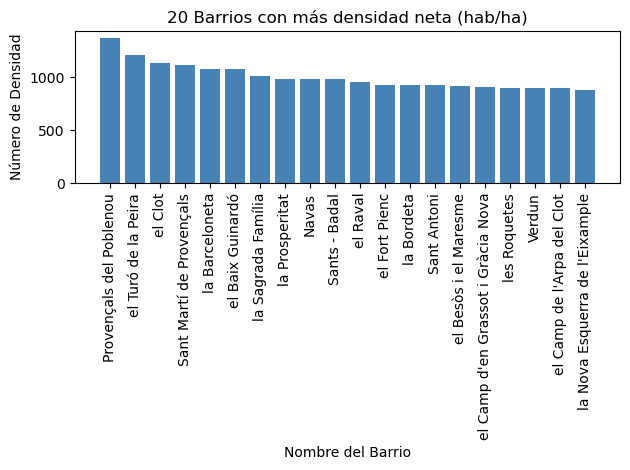

In [22]:
# Definir la actividad específica para la cual deseas mostrar los 20 barrios principales
actividad_columna = 'Activitats de la construcció'
# Obtener los 20 barrios con la mayor cantidad de esa actividad
top_20_barrios = df_conjunto.nlargest(20, actividad_columna)
# Obtener los datos de número de actividad y nombre del barrio para los 20 barrios principales
num_actividad = top_20_barrios[actividad_columna]
nombres_barrio = top_20_barrios['BARRIS']
# Crear el gráfico de barras con el color personalizado
plt.bar(nombres_barrio, num_actividad, color='orange')
# Ajustar aspectos visuales
plt.xlabel('Nombre del Barrio')
plt.ylabel('Número de Actividad')
plt.title('20 Barrios con más Actividad de Construcción')
# Rotar los nombres de los barrios en el eje x para evitar superposición
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Definir la actividad específica para la cual deseas mostrar los 20 barrios principales
actividad_columna = 'Densitat neta (hab/ha)'
# Obtener los 20 barrios con la mayor cantidad de esa actividad
top_20_barrios = df_conjunto.nlargest(20, actividad_columna)
# Obtener los datos de número de actividad y nombre del barrio para los 20 barrios principales
num_actividad = top_20_barrios[actividad_columna]
nombres_barrio = top_20_barrios['BARRIS']
# Crear el gráfico de barras para los 20 barrios principales
plt.bar(nombres_barrio, num_actividad, color='steelblue')
# Ajustar aspectos visuales
plt.xlabel('Nombre del Barrio')
plt.ylabel('Número de Densidad')
plt.title('20 Barrios con más densidad neta (hab/ha)')
# Rotar los nombres de los barrios en el eje x para evitar superposición
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Función para formatear el nombre de columna
def formatear_nombre_columna(columna):
    columna = columna.upper()
    columna = re.sub(r"[^\w\s]", "", columna)
    columna = re.sub(r"\s+", " ", columna)
    palabras_no_deseadas = ['DE', 'LA', 'I', '/']
    palabras = [palabra for palabra in columna.split() if palabra not in palabras_no_deseadas]
    columna = '_'.join(palabras)
    return columna

# Obtener los nombres de columnas originales del DataFrame
columnas_originales = df_conjunto.columns.tolist()

# Obtener los nombres de columnas modificados
columnas_modificadas = [formatear_nombre_columna(col) for col in columnas_originales]

# Renombrar las columnas en el DataFrame
df_conjunto.rename(columns=dict(zip(columnas_originales, columnas_modificadas)), inplace=True)
df_conjunto = df_conjunto.loc[:, ~df_conjunto.columns.duplicated()]
df_conjunto.drop(['ÒPTIQUES_FOTOGRAFIA','SOUVENIRS_BASARS'],axis='columns', inplace = True)
df_conjunto = df_conjunto.rename(columns={'ALTRES_PER_EXEMPLE_VENDING':'VENDING'})
# Verificar el DataFrame con los nombres de columna modificados
df_conjunto.to_csv('../Data/tabla.csv',index=False)
df_conjunto

In [ ]:
df_conjunto.describe()